## 便利店销量预测
这是[便利店销量预测比赛](https://www.kaggle.com/c/rossmann-store-sales)的一个简单尝试参考。<br>

<h1 class="page-name">
    Forecast sales using store, promotion, and competitor data
</h1>


<p>Rossmann operates over 3,000 drug stores in 7 European countries. Currently, <br />Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.</p>
<p><span style="font-size: 1em; line-height: 1.5em;">In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! </span></p>
<p><span style="font-size: 1em; line-height: 1.5em;"> <img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/4594/media/rossmann_banner2.png" alt="" height="81" width="640" /><br /></span></p>
<p><em><span style="font-size: 1em; line-height: 1.5em;">If you are interested in joining Rossmann at their headquarters near Hanover, Germany, please contact Mr. Frank König (Frank.Koenig {at} rossmann.de) Rossmann is currently recruiting data scientists at <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=3A5205E3-C4F9-4F5D-AA93-438D0B064D70~">senior</a> and <a href="http://www.rossmann.de/unternehmen/karriere/stellenboerse/stellenanzeigen~jid=F5142F37-C823-4767-B7CF-21DE3B351D66~">entry-level</a> positions.</span></em></p>


### 数据
<table id="data-files" class="nicetable full roomy align-top border">   
<thead>
    <tr>
        <th colspan="2">File Name</th> 
        <th>Available Formats</th>         
    </tr> 
</thead>

    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">sample_submission.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/sample_submission.csv.zip" name="sample_submission.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (55.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">store.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/store.csv.zip" name="store.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (8.33 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">test.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/test.csv.zip" name="test.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (143.25 kb)</a>                    </td>
        </tr>

    </tbody>
    <tbody  >
        <tr>

            <td class="file-name" colspan="2" rowspan="1">train.csv</td>
            <td>
<a href="/c/rossmann-store-sales/download/train.csv.zip" name="train.csv.zip" onclick="window.Intercom(&#39;trackEvent&#39;,&#39;download_compdata&#39;,{&#39;comp_id&#39;: 4594});">.zip (5.66 mb)</a>                    </td>
        </tr>

    </tbody>
</table>

<p>You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.</p>

<h3>Files</h3>
<ul>
<li><strong>train.csv</strong> - historical data including Sales</li>
<li><strong>test.csv</strong> - historical data excluding Sales</li>
<li><strong>sample_submission.csv</strong> - a sample submission file in the correct format</li>
<li><strong>store.csv</strong> - supplemental information about the stores</li>
</ul>
<h3>Data fields</h3>
<p>Most of the fields are self-explanatory. The following are descriptions for those that aren't.</p>
<ul>
<li><strong>Id</strong> - an Id that represents a (Store, Date) duple within the test set</li>
<li><strong>Store</strong> - a unique Id for each store</li>
<li><strong>Sales</strong> - the turnover for any given day (this is what you are predicting)</li>
<li><strong>Customers</strong> - the number of customers on a given day</li>
<li><strong>Open</strong> - an indicator for whether the store was open: 0 = closed, 1 = open</li>
<li><strong>StateHoliday</strong> - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None</li>
<li><strong>SchoolHoliday</strong> - indicates if the (Store, Date) was affected by the closure of public schools</li>
<li><strong>StoreType</strong> - differentiates between 4 different store models: a, b, c, d</li>
<li><strong>Assortment</strong> - describes an assortment level: a = basic, b = extra, c = extended</li>
<li><strong>CompetitionDistance</strong> - distance in meters to the nearest competitor store</li>
<li><strong>CompetitionOpenSince[Month/Year]</strong> - gives the approximate year and month of the time the nearest competitor was opened</li>
<li><strong>Promo</strong> - indicates whether a store is running a promo on that day</li>
<li><strong>Promo2</strong> - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating</li>
<li><strong>Promo2Since[Year/Week]</strong> - describes the year and calendar week when the store started participating in Promo2</li>
<li><strong>PromoInterval</strong> - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store</li>
</ul>

### 引入所需的库

In [2]:
import pandas as pd
import datetime
import csv
import numpy as np
import os
import scipy as sp
import xgboost as xgb
import itertools
import operator
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import TransformerMixin
from sklearn import model_selection
from matplotlib import pylab as plt
import matplotlib.pyplot as pltt
% matplotlib inline

plot = True

goal = 'Sales'
myid = 'Id'

### 定义一些变换和评判准则
使用不同的loss function的时候要特别注意这个

In [4]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [4]:
store = pd.read_csv('./data/store.csv')

In [5]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df = pd.read_csv('./data/train.csv')

In [7]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
train_df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6049        195
6214        195
5723        194
5449        192
5140        191
5489        191
5041        190
5665        188
6052        188
5931        188
5584        187
5200        187
5824        187
5056        187
5197        187
5697        185
5316        185
5535        184
4842        184
5945        184
6228        184
5096        184
5628        184
5818        184
5477        183
6182        182
          ...  
33093         1
17243         1
22065         1
21558         1
20824         1
19509         1
20827         1
24925         1
21712         1
31445         1
28768         1
19800         1
20580         1
23898         1
20312         1
18265         1
22873         1
16731         1
18643         1
22227         1
18129         1
21203         1
23250         1
19152         1
20315         1
32605         1
24275         1
26167         1
17971         1
22905         1
Name: Sales, Length: 217

In [9]:
train_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

(array([1.72877e+05, 1.07000e+02, 6.20000e+02, 1.89600e+03, 4.13000e+03,
        8.39000e+03, 1.41860e+04, 2.16560e+04, 3.14910e+04, 4.13200e+04,
        4.93110e+04, 5.53090e+04, 5.84920e+04, 5.91820e+04, 5.79320e+04,
        5.40820e+04, 4.93650e+04, 4.49760e+04, 4.12180e+04, 3.56050e+04,
        3.09410e+04, 2.65370e+04, 2.31100e+04, 1.95920e+04, 1.69870e+04,
        1.44620e+04, 1.21680e+04, 1.02250e+04, 8.60900e+03, 7.16100e+03,
        6.04700e+03, 5.08100e+03, 4.37100e+03, 3.73900e+03, 3.23900e+03,
        2.79300e+03, 2.41100e+03, 2.03900e+03, 1.84100e+03, 1.67300e+03,
        1.45600e+03, 1.20800e+03, 1.10900e+03, 1.03500e+03, 9.09000e+02,
        7.95000e+02, 7.42000e+02, 6.14000e+02, 5.48000e+02, 4.85000e+02,
        4.15000e+02, 3.52000e+02, 3.38000e+02, 2.56000e+02, 2.61000e+02,
        2.03000e+02, 1.83000e+02, 1.39000e+02, 9.90000e+01, 1.16000e+02,
        9.20000e+01, 6.70000e+01, 7.10000e+01, 6.10000e+01, 7.30000e+01,
        4.50000e+01, 4.00000e+01, 5.00000e+01, 3.30

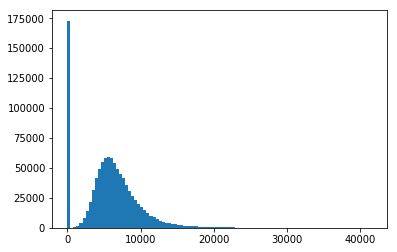

In [11]:
pltt.hist(train_df['Sales'], bins=100) 

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 7.0000e+00, 7.0000e+00, 1.1000e+01, 1.5000e+01,
        3.1000e+01, 1.8000e+01, 2.9000e+01, 3.4000e+01, 5.4000e+01,
        1.0300e+02, 1.3500e+02, 1.8700e+02, 2.2300e+02, 3.5300e+02,
        4.2700e+02, 5.5000e+02, 6.3200e+02, 9.1600e+02, 1.3140e+03,
        1.7280e+03, 2.3680e+03, 3.1540e+03, 4.4120e+03, 5.6570e+03,
        7.5640e+03, 9.8170e+03, 1.2837e+04, 1.6868e+04, 2.2068e+04,
        2.7077e+04, 3.3268e+04, 3.8761e+04, 4.4885e+04, 5.0245e+04,
        5.4024e+04, 5.7061e+04, 5.6943e+04, 5.55

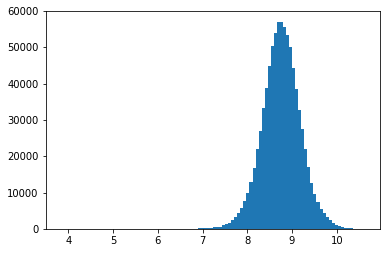

In [24]:
pltt.hist(np.log(train_df[train_df['Sales']>0]['Sales']), bins=100) 

In [25]:
train_df[['Sales','Open']]

,Sales,Open
0,5263,1
1,6064,1
2,8314,1
3,13995,1
4,4822,1
5,5651,1
6,15344,1
7,8492,1
8,8565,1
9,7185,1


In [27]:
train_df['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6049        195
6214        195
5723        194
5449        192
5140        191
5489        191
5041        190
5665        188
6052        188
5931        188
5584        187
5200        187
5824        187
5056        187
5197        187
5697        185
5316        185
5535        184
4842        184
5945        184
6228        184
5096        184
5628        184
5818        184
5477        183
6182        182
          ...  
33093         1
17243         1
22065         1
21558         1
20824         1
19509         1
20827         1
24925         1
21712         1
31445         1
28768         1
19800         1
20580         1
23898         1
20312         1
18265         1
22873         1
16731         1
18643         1
22227         1
18129         1
21203         1
23250         1
19152         1
20315         1
32605         1
24275         1
26167         1
17971         1
22905         1
Name: Sales, Length: 217

In [28]:
train_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [9]:
test_df = pd.read_csv('./data/test.csv')

In [10]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### 加载数据

In [11]:
def load_data():
    """
        加载数据，设定数值型和非数值型数据
    """
    store = pd.read_csv('./data/store.csv')
    train_org = pd.read_csv('./data/train.csv',dtype={'StateHoliday':pd.np.string_})
    test_org = pd.read_csv('./data/test.csv',dtype={'StateHoliday':pd.np.string_})
    train = pd.merge(train_org,store, on='Store', how='left')
    test = pd.merge(test_org,store, on='Store', how='left')
    features = test.columns.tolist()
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    features_numeric = test.select_dtypes(include=numerics).columns.tolist()
    features_non_numeric = [f for f in features if f not in features_numeric]
    return (train,test,features,features_non_numeric)

### 数据与特征处理

In [13]:
def process_data(train,test,features,features_non_numeric):
    """
        Feature engineering and selection.
    """
    # FEATURE ENGINEERING
    train = train[train['Sales'] > 0]

    for data in [train,test]:
        # year month day
        data['year'] = data.Date.apply(lambda x: x.split('-')[0])
        data['year'] = data['year'].astype(float)
        data['month'] = data.Date.apply(lambda x: x.split('-')[1])
        data['month'] = data['month'].astype(float)
        data['day'] = data.Date.apply(lambda x: x.split('-')[2])
        data['day'] = data['day'].astype(float)

        # promo interval "Jan,Apr,Jul,Oct"
        data['promojan'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Jan" in x else 0)
        data['promofeb'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Feb" in x else 0)
        data['promomar'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Mar" in x else 0)
        data['promoapr'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Apr" in x else 0)
        data['promomay'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "May" in x else 0)
        data['promojun'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Jun" in x else 0)
        data['promojul'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Jul" in x else 0)
        data['promoaug'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Aug" in x else 0)
        data['promosep'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Sep" in x else 0)
        data['promooct'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Oct" in x else 0)
        data['promonov'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Nov" in x else 0)
        data['promodec'] = data.PromoInterval.apply(lambda x: 0 if isinstance(x, float) else 1 if "Dec" in x else 0)

    # Features set.
    noisy_features = [myid,'Date']
    features = [c for c in features if c not in noisy_features]
    features_non_numeric = [c for c in features_non_numeric if c not in noisy_features]
    features.extend(['year','month','day'])
    # Fill NA
    class DataFrameImputer(TransformerMixin):
        # http://stackoverflow.com/questions/25239958/impute-categorical-missing-values-in-scikit-learn
        def __init__(self):
            """Impute missing values.
            Columns of dtype object are imputed with the most frequent value
            in column.
            Columns of other types are imputed with mean of column.
            """
        def fit(self, X, y=None):
            self.fill = pd.Series([X[c].value_counts().index[0] # mode
                if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], # mean
                index=X.columns)
            return self
        def transform(self, X, y=None):
            return X.fillna(self.fill)
    train = DataFrameImputer().fit_transform(train)
    test = DataFrameImputer().fit_transform(test)
    # Pre-processing non-numberic values
    le = LabelEncoder()
    for col in features_non_numeric:
        le.fit(list(train[col])+list(test[col]))
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])
    # LR和神经网络这种模型都对输入数据的幅度极度敏感，请先做归一化操作
    scaler = StandardScaler()
    for col in set(features) - set(features_non_numeric) - \
      set([]): # TODO: add what not to scale
        scaler.fit(train[col].reshape(-1,1))
        train[col] = scaler.transform(train[col].reshape(-1,1))
        test[col] = scaler.transform(test[col].reshape(-1,1))
    return (train,test,features,features_non_numeric)

### 训练与分析

In [12]:
def XGB_native(train,test,features,features_non_numeric):
    depth = 13
    eta = 0.01
    ntrees = 8000
    mcw = 3
    params = {"objective": "reg:linear",
              "booster": "gbtree",
              "eta": eta,
              "max_depth": depth,
              "min_child_weight": mcw,
              "subsample": 0.9,
              "colsample_bytree": 0.7,
              "silent": 1
              }
    print("Running with params: " + str(params))
    print("Running with ntrees: " + str(ntrees))
    print("Running with features: " + str(features))

    # Train model with local split
    tsize = 0.05
    X_train, X_test = model_selection.train_test_split(train, test_size=tsize)
    dtrain = xgb.DMatrix(X_train[features], np.log(X_train[goal] + 1))
    dvalid = xgb.DMatrix(X_test[features], np.log(X_test[goal] + 1))
    watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    gbm = xgb.train(params, dtrain, ntrees, evals=watchlist, early_stopping_rounds=100, feval=rmspe_xg, verbose_eval=True)
    train_probs = gbm.predict(xgb.DMatrix(X_test[features]))
    indices = train_probs < 0
    train_probs[indices] = 0
    error = rmspe(np.exp(train_probs) - 1, X_test[goal].values)
    print(error)

    # Predict and Export
    test_probs = gbm.predict(xgb.DMatrix(test[features]))
    indices = test_probs < 0
    test_probs[indices] = 0
    submission = pd.DataFrame({myid: test[myid], goal: np.exp(test_probs) - 1})
    if not os.path.exists('result/'):
        os.makedirs('result/')
    submission.to_csv("./result/dat-xgb_d%s_eta%s_ntree%s_mcw%s_tsize%s.csv" % (str(depth),str(eta),str(ntrees),str(mcw),str(tsize)) , index=False)
    # Feature importance
    if plot:
      outfile = open('xgb.fmap', 'w')
      i = 0
      for feat in features:
          outfile.write('{0}\t{1}\tq\n'.format(i, feat))
          i = i + 1
      outfile.close()
      importance = gbm.get_fscore(fmap='xgb.fmap')
      importance = sorted(importance.items(), key=operator.itemgetter(1))
      df = pd.DataFrame(importance, columns=['feature', 'fscore'])
      df['fscore'] = df['fscore'] / df['fscore'].sum()
      # Plotitup
      plt.figure()
      df.plot()
      df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(25, 15))
      plt.title('XGBoost Feature Importance')
      plt.xlabel('relative importance')
      plt.gcf().savefig('Feature_Importance_xgb_d%s_eta%s_ntree%s_mcw%s_tsize%s.png' % (str(depth),str(eta),str(ntrees),str(mcw),str(tsize)))

In [ ]:
print("=> 载入数据中...")
train,test,features,features_non_numeric = load_data()
print("=> 处理数据与特征工程...")
train,test,features,features_non_numeric = process_data(train,test,features,features_non_numeric)
print("=> 使用XGBoost建模...")
XGB_native(train,test,features,features_non_numeric)

=> 载入数据中...
=> 处理数据与特征工程...
=> 使用XGBoost建模...
Running with params: {'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.01, 'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.9, 'colsample_bytree': 0.7, 'silent': 1}
Running with ntrees: 8000
Running with features: ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day']
[0]	eval-rmse:8.18824	train-rmse:8.18605	eval-rmspe:0.999864	train-rmspe:0.999864
Multiple eval metrics have been passed: 'train-rmspe' will be used for early stopping.

Will train until train-rmspe hasn't improved in 100 rounds.
[1]	eval-rmse:8.10657	train-rmse:8.10439	eval-rmspe:0.999838	train-rmspe:0.999838
[2]	eval-rmse:8.02569	train-rmse:8.0235	eval-rmspe:0.99981	train-rmspe:0.999809
[3]	eval-rmse:7.9456	train-rmse:7.94343	eval-rmspe:0.99978	train-

[91]	eval-rmse:3.29332	train-rmse:3.29187	eval-rmspe:0.960601	train-rmspe:0.960549
[92]	eval-rmse:3.26063	train-rmse:3.2592	eval-rmspe:0.959298	train-rmspe:0.959244
[93]	eval-rmse:3.22829	train-rmse:3.22687	eval-rmspe:0.957965	train-rmspe:0.957908
[94]	eval-rmse:3.19623	train-rmse:3.19481	eval-rmspe:0.956608	train-rmspe:0.956547
[95]	eval-rmse:3.16454	train-rmse:3.16312	eval-rmspe:0.955216	train-rmspe:0.955151
[96]	eval-rmse:3.13315	train-rmse:3.13173	eval-rmspe:0.953796	train-rmspe:0.953727
[97]	eval-rmse:3.10207	train-rmse:3.10066	eval-rmspe:0.952349	train-rmspe:0.952276
[98]	eval-rmse:3.07131	train-rmse:3.06989	eval-rmspe:0.950873	train-rmspe:0.950794
[99]	eval-rmse:3.04083	train-rmse:3.03942	eval-rmspe:0.949369	train-rmspe:0.949285
[100]	eval-rmse:3.0107	train-rmse:3.0093	eval-rmspe:0.947826	train-rmspe:0.947737
[101]	eval-rmse:2.98086	train-rmse:2.97946	eval-rmspe:0.946257	train-rmspe:0.946163
[102]	eval-rmse:2.95128	train-rmse:2.94989	eval-rmspe:0.944666	train-rmspe:0.944566
[103

[190]	eval-rmse:1.23891	train-rmse:1.23762	eval-rmspe:0.704218	train-rmspe:0.69875
[191]	eval-rmse:1.22689	train-rmse:1.22561	eval-rmspe:0.700829	train-rmspe:0.695204
[192]	eval-rmse:1.215	train-rmse:1.21371	eval-rmspe:0.697454	train-rmspe:0.691655
[193]	eval-rmse:1.20329	train-rmse:1.20199	eval-rmspe:0.694081	train-rmspe:0.688092
[194]	eval-rmse:1.1917	train-rmse:1.19041	eval-rmspe:0.690722	train-rmspe:0.684523
[195]	eval-rmse:1.18025	train-rmse:1.17896	eval-rmspe:0.687345	train-rmspe:0.680947
[196]	eval-rmse:1.16884	train-rmse:1.16755	eval-rmspe:0.683973	train-rmspe:0.677385
[197]	eval-rmse:1.15759	train-rmse:1.15628	eval-rmspe:0.680614	train-rmspe:0.673818
[198]	eval-rmse:1.14649	train-rmse:1.14518	eval-rmspe:0.677244	train-rmspe:0.670235
[199]	eval-rmse:1.13548	train-rmse:1.13417	eval-rmspe:0.673875	train-rmspe:0.666661
[200]	eval-rmse:1.12461	train-rmse:1.1233	eval-rmspe:0.670504	train-rmspe:0.663078
[201]	eval-rmse:1.11379	train-rmse:1.11247	eval-rmspe:0.667173	train-rmspe:0.6595

[287]	eval-rmse:0.505508	train-rmse:0.503546	eval-rmspe:0.440268	train-rmspe:0.387359
[288]	eval-rmse:0.50116	train-rmse:0.499188	eval-rmspe:0.438661	train-rmspe:0.384897
[289]	eval-rmse:0.496973	train-rmse:0.494984	eval-rmspe:0.437071	train-rmspe:0.382401
[290]	eval-rmse:0.49284	train-rmse:0.490833	eval-rmspe:0.435506	train-rmspe:0.379877
[291]	eval-rmse:0.488655	train-rmse:0.486643	eval-rmspe:0.433963	train-rmspe:0.377463
[292]	eval-rmse:0.484553	train-rmse:0.482528	eval-rmspe:0.432672	train-rmspe:0.375094
[293]	eval-rmse:0.480448	train-rmse:0.478411	eval-rmspe:0.431179	train-rmspe:0.372727
[294]	eval-rmse:0.476438	train-rmse:0.474384	eval-rmspe:0.429727	train-rmspe:0.370394
[295]	eval-rmse:0.472535	train-rmse:0.470464	eval-rmspe:0.428202	train-rmspe:0.368098
[296]	eval-rmse:0.468566	train-rmse:0.466481	eval-rmspe:0.426765	train-rmspe:0.365775
[297]	eval-rmse:0.46474	train-rmse:0.462636	eval-rmspe:0.425284	train-rmspe:0.363514
[298]	eval-rmse:0.460779	train-rmse:0.458665	eval-rmspe:0

[383]	eval-rmse:0.257781	train-rmse:0.253897	eval-rmspe:0.37719	train-rmspe:0.23531
[384]	eval-rmse:0.256458	train-rmse:0.252552	eval-rmspe:0.377302	train-rmspe:0.234523
[385]	eval-rmse:0.255047	train-rmse:0.251127	eval-rmspe:0.377244	train-rmspe:0.233682
[386]	eval-rmse:0.253745	train-rmse:0.249806	eval-rmspe:0.3772	train-rmspe:0.232909
[387]	eval-rmse:0.252471	train-rmse:0.248512	eval-rmspe:0.377246	train-rmspe:0.232144
[388]	eval-rmse:0.25126	train-rmse:0.247272	eval-rmspe:0.377265	train-rmspe:0.231177
[389]	eval-rmse:0.250089	train-rmse:0.246073	eval-rmspe:0.377452	train-rmspe:0.230498
[390]	eval-rmse:0.24891	train-rmse:0.244863	eval-rmspe:0.377503	train-rmspe:0.229759
[391]	eval-rmse:0.247689	train-rmse:0.243622	eval-rmspe:0.377487	train-rmspe:0.228992
[392]	eval-rmse:0.246491	train-rmse:0.242407	eval-rmspe:0.377489	train-rmspe:0.228303
[393]	eval-rmse:0.24525	train-rmse:0.241153	eval-rmspe:0.377591	train-rmspe:0.227584
[394]	eval-rmse:0.244137	train-rmse:0.240018	eval-rmspe:0.377

[479]	eval-rmse:0.183221	train-rmse:0.177609	eval-rmspe:0.387689	train-rmspe:0.189983
[480]	eval-rmse:0.182856	train-rmse:0.17722	eval-rmspe:0.387342	train-rmspe:0.189551
[481]	eval-rmse:0.182333	train-rmse:0.176679	eval-rmspe:0.387371	train-rmspe:0.189238
[482]	eval-rmse:0.181884	train-rmse:0.176221	eval-rmspe:0.387908	train-rmspe:0.188998
[483]	eval-rmse:0.181412	train-rmse:0.175744	eval-rmspe:0.388489	train-rmspe:0.188739
[484]	eval-rmse:0.180981	train-rmse:0.17531	eval-rmspe:0.388451	train-rmspe:0.188506
[485]	eval-rmse:0.180687	train-rmse:0.175002	eval-rmspe:0.388602	train-rmspe:0.188246
[486]	eval-rmse:0.180292	train-rmse:0.174591	eval-rmspe:0.388716	train-rmspe:0.188004
[487]	eval-rmse:0.179976	train-rmse:0.174255	eval-rmspe:0.388833	train-rmspe:0.187651
[488]	eval-rmse:0.17954	train-rmse:0.173811	eval-rmspe:0.389079	train-rmspe:0.187413
[489]	eval-rmse:0.17912	train-rmse:0.173382	eval-rmspe:0.389284	train-rmspe:0.187185
[490]	eval-rmse:0.178817	train-rmse:0.173066	eval-rmspe:0.

[575]	eval-rmse:0.15839	train-rmse:0.151757	eval-rmspe:0.397321	train-rmspe:0.174827
[576]	eval-rmse:0.158247	train-rmse:0.151603	eval-rmspe:0.39738	train-rmspe:0.174737
[577]	eval-rmse:0.158172	train-rmse:0.151525	eval-rmspe:0.397418	train-rmspe:0.174726
[578]	eval-rmse:0.157929	train-rmse:0.151281	eval-rmspe:0.39761	train-rmspe:0.174562
[579]	eval-rmse:0.157744	train-rmse:0.151096	eval-rmspe:0.397664	train-rmspe:0.174452
[580]	eval-rmse:0.157636	train-rmse:0.150981	eval-rmspe:0.397729	train-rmspe:0.174407
[581]	eval-rmse:0.157493	train-rmse:0.150835	eval-rmspe:0.39775	train-rmspe:0.174334
[582]	eval-rmse:0.157391	train-rmse:0.150722	eval-rmspe:0.397814	train-rmspe:0.174276
[583]	eval-rmse:0.157097	train-rmse:0.150418	eval-rmspe:0.398166	train-rmspe:0.174052
[584]	eval-rmse:0.156766	train-rmse:0.150076	eval-rmspe:0.398251	train-rmspe:0.173777
[585]	eval-rmse:0.156586	train-rmse:0.14989	eval-rmspe:0.397954	train-rmspe:0.173658
[586]	eval-rmse:0.156397	train-rmse:0.149696	eval-rmspe:0.3